In [1]:
import os
import pandas as pd

read_path = os.getcwd()
df_url = read_path + '/Output/GoldDataframe.csv'

In [2]:
#import warnings
#warnings.filterwarnings("ignore")

In [3]:
#One dataframe per country

df = pd.read_csv(df_url)
corr_df = pd.DataFrame()
corr_df.index.names = ['Country']
aux_df = pd.DataFrame()

#List all the countries, none repeated
countries = set(df['Country'].to_list())

country_dict = {}
corr_dict = {}

for country in countries:

    #Get the DataFrame for a given country
    country_df = df.loc[df['Country'] == country]

    #Correlation matrix for that country
    country_corr_df = country_df.corr()

    #Trim it into a single row
    country_corr_df = country_corr_df.rename(columns = {'GDP': country}).drop(index = ['Year', 'GDP'])

    #Add the row to a new DataFrame with the correlations for each country
    corr_df = pd.concat([corr_df, country_corr_df[country]], axis = 1)

#Transpose the resulting DataFrame to have the desired format and show it
corr_df = corr_df.transpose()
corr_df

#corr_df.to_csv(read_path + '/Output/corr.csv')


,% Undernourishment,AgriShareGDP,CreditToAgriFishForest,EmploymentRural,%EmploymentAgriFishForest,% Soldiers,Employment in industry,Employment in services,Birth Rate,Cost business start-up,...,% Rural Population,Tertiary School Gender Parity,Suicide Rate,% Vulnerable female employment,% Vulnerable male employment,Gini,Civil Liberties,Freedom of Expression,% Healthcare Investment,Population
Argentina,-0.694641,-0.503461,0.656928,NaN,-0.724813,-0.696227,0.423928,-0.065609,-0.715829,-0.053572,...,-0.780874,0.780915,-0.360028,-0.288908,-0.512770,-0.854086,0.145350,-0.597334,-0.271214,0.763368
Senegal,-0.967884,-0.064157,-0.749358,NaN,NaN,-0.751124,0.969599,0.961313,-0.828994,-0.961995,...,-0.960345,0.914266,-0.984000,-0.957135,-0.961607,NaN,0.377412,0.737131,-0.946089,0.950633
Poland,NaN,-0.510488,NaN,-0.363683,-0.952876,-0.424615,0.704549,0.918627,0.491552,-0.899823,...,0.905010,0.727306,-0.447770,-0.944188,-0.966692,-0.938857,-0.507959,-0.510648,0.904175,-0.827611
Guatemala,-0.789840,-0.910784,-0.330781,NaN,NaN,-0.780193,-0.822930,0.920172,-0.958764,-0.967957,...,-0.993836,NaN,-0.904996,-0.866821,-0.952079,NaN,0.755812,0.093338,0.800016,0.994983
Montenegro,-0.921434,-0.925047,NaN,NaN,NaN,NaN,-0.809392,0.847853,-0.748720,NaN,...,-0.934981,-0.520704,0.105303,-0.362766,0.037470,NaN,0.558700,0.825413,NaN,0.951388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Central African Republic,-0.098914,-0.650892,NaN,NaN,NaN,0.363069,-0.690013,0.811221,-0.718428,-0.494454,...,-0.684527,NaN,-0.729916,0.316015,-0.893792,NaN,-0.749410,0.037410,-0.813613,0.874887
Armenia,-0.945359,-0.859478,-0.708082,NaN,NaN,0.083992,0.510793,0.753895,0.575704,-0.946572,...,0.914839,-0.288110,0.329741,-0.773852,-0.871018,-0.659740,0.781947,0.446507,0.203976,-0.787782
Bahrain,NaN,-0.780047,-0.702905,NaN,NaN,-0.952605,0.940184,-0.934874,-0.978124,NaN,...,-0.886818,NaN,-0.386867,0.111721,-0.842494,NaN,-0.874272,-0.715059,-0.384559,0.973606
Botswana,0.623936,-0.524702,0.750977,NaN,NaN,-0.934590,-0.888323,0.752620,-0.867502,-0.862202,...,-0.954849,NaN,-0.940273,-0.130800,0.132985,NaN,0.407461,-0.471993,0.818853,0.950102


In [4]:
#Clean the data deleting rows or columns with too many missing values
clean_corr_df = corr_df

#Indicators with no correlations
clean_corr_df = corr_df.dropna(axis = 'columns', how = 'all')
clean_corr_df

#clean_corr_df = clean_corr_df.dropna(axis = 'rows', thresh = 10)

cols = set(corr_df.columns) - set(clean_corr_df.columns)
print(cols)
clean_corr_df

set()


,% Undernourishment,AgriShareGDP,CreditToAgriFishForest,EmploymentRural,%EmploymentAgriFishForest,% Soldiers,Employment in industry,Employment in services,Birth Rate,Cost business start-up,...,% Rural Population,Tertiary School Gender Parity,Suicide Rate,% Vulnerable female employment,% Vulnerable male employment,Gini,Civil Liberties,Freedom of Expression,% Healthcare Investment,Population
Argentina,-0.694641,-0.503461,0.656928,NaN,-0.724813,-0.696227,0.423928,-0.065609,-0.715829,-0.053572,...,-0.780874,0.780915,-0.360028,-0.288908,-0.512770,-0.854086,0.145350,-0.597334,-0.271214,0.763368
Senegal,-0.967884,-0.064157,-0.749358,NaN,NaN,-0.751124,0.969599,0.961313,-0.828994,-0.961995,...,-0.960345,0.914266,-0.984000,-0.957135,-0.961607,NaN,0.377412,0.737131,-0.946089,0.950633
Poland,NaN,-0.510488,NaN,-0.363683,-0.952876,-0.424615,0.704549,0.918627,0.491552,-0.899823,...,0.905010,0.727306,-0.447770,-0.944188,-0.966692,-0.938857,-0.507959,-0.510648,0.904175,-0.827611
Guatemala,-0.789840,-0.910784,-0.330781,NaN,NaN,-0.780193,-0.822930,0.920172,-0.958764,-0.967957,...,-0.993836,NaN,-0.904996,-0.866821,-0.952079,NaN,0.755812,0.093338,0.800016,0.994983
Montenegro,-0.921434,-0.925047,NaN,NaN,NaN,NaN,-0.809392,0.847853,-0.748720,NaN,...,-0.934981,-0.520704,0.105303,-0.362766,0.037470,NaN,0.558700,0.825413,NaN,0.951388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Central African Republic,-0.098914,-0.650892,NaN,NaN,NaN,0.363069,-0.690013,0.811221,-0.718428,-0.494454,...,-0.684527,NaN,-0.729916,0.316015,-0.893792,NaN,-0.749410,0.037410,-0.813613,0.874887
Armenia,-0.945359,-0.859478,-0.708082,NaN,NaN,0.083992,0.510793,0.753895,0.575704,-0.946572,...,0.914839,-0.288110,0.329741,-0.773852,-0.871018,-0.659740,0.781947,0.446507,0.203976,-0.787782
Bahrain,NaN,-0.780047,-0.702905,NaN,NaN,-0.952605,0.940184,-0.934874,-0.978124,NaN,...,-0.886818,NaN,-0.386867,0.111721,-0.842494,NaN,-0.874272,-0.715059,-0.384559,0.973606
Botswana,0.623936,-0.524702,0.750977,NaN,NaN,-0.934590,-0.888323,0.752620,-0.867502,-0.862202,...,-0.954849,NaN,-0.940273,-0.130800,0.132985,NaN,0.407461,-0.471993,0.818853,0.950102


In [5]:
#Countries still with not enough indicators
#How many countries would remain depending on the threshold we use for indicators?

dict_count = {}

n_indicators = len(clean_corr_df.columns)

for i in range(0, n_indicators + 1):
    dict_count[i] = 0

for country in clean_corr_df.index:
    count = clean_corr_df.loc[country].count()
    dict_count[count] += 1

dict_count

i = n_indicators - 1
while i >= 0:
    dict_count[i] += dict_count[i + 1]
    i -= 1
dict_count

min = max(dict_count.values()) * 0.8
for i in range(1, len(dict_count)):
    if dict_count[i] < min:
        threshold = dict_count[i]
        break
    i += i


#print(len(dict_count))
print(min)
print(i)
print(threshold)

122.4
25
104


In [6]:
#What countries would be deleted?
df_count = pd.DataFrame()
print(df_count)
for country in corr_df.index:
    count = corr_df.loc[country].count()
    country_series = pd.Series({'Country': country, 'Indicators': count})
    df_count = pd.concat([df_count, country_series], axis = 1, ignore_index = True)
    #df_count = df_count.append({'Country': country, 'Indicators': count}, ignore_index = True)

df_count = df_count.transpose()
print(df_count)

print(list(df_count['Country']))

import plotly.express as px

fig = px.choropleth(df_count, locations="Country", locationmode='country names', 
                     color="Indicators", hover_name="Country",projection="mercator",
                     color_continuous_scale='Reds',
                 width=700, height=500)
fig.update(layout_coloraxis_showscale=True)

fig.show()

#grp = cases.groupby(['Country/Region'])[['Confirmed', 'Deaths', 'Recovered']].max()
#grp = grp.reset_index()
#grp['Country'] = grp['Country/Region']
""" 
fig = px.choropleth(grp, locations="Country", locationmode='country names', 
                     color="Confirmed", hover_name="Country/Region",hover_data = [grp.Recovered,grp.Deaths],projection="mercator",
                     color_continuous_scale='Reds',
                 width=700, height=500)
fig.update(layout_coloraxis_showscale=True) """

Empty DataFrame
Columns: []
Index: []
                      Country Indicators
0                   Argentina         31
1                     Senegal         26
2                      Poland         30
3                   Guatemala         27
4                  Montenegro         22
..                        ...        ...
148  Central African Republic         24
149                   Armenia         29
150                   Bahrain         23
151                  Botswana         24
152             United States         28

[153 rows x 2 columns]
['Argentina', 'Senegal', 'Poland', 'Guatemala', 'Montenegro', 'Albania', 'Denmark', 'Italy', 'Nepal', 'Romania', 'El Salvador', 'Papua New Guinea', 'Cyprus', 'China', 'Pakistan', 'Iceland', 'Tunisia', 'Australia', 'Costa Rica', 'Lesotho', 'South Sudan', 'Qatar', 'Azerbaijan', 'Hungary', 'Honduras', 'Zimbabwe', 'Fiji', 'Estonia', 'Trinidad and Tobago', 'Benin', 'Algeria', 'Portugal', 'Tajikistan', 'Myanmar', 'Chad', 'Bhutan', 'Ukraine', 'Leban

' \nfig = px.choropleth(grp, locations="Country", locationmode=\'country names\', \n                     color="Confirmed", hover_name="Country/Region",hover_data = [grp.Recovered,grp.Deaths],projection="mercator",\n                     color_continuous_scale=\'Reds\',\n                 width=700, height=500)\nfig.update(layout_coloraxis_showscale=True) '

In [7]:
""" #corr_dict = {}

cor=country_dict['Spain'].corr()['GDP'].to_list()
print(cor)
#Correlations and all """



" #corr_dict = {}\n\ncor=country_dict['Spain'].corr()['GDP'].to_list()\nprint(cor)\n#Correlations and all "

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.cluster import OPTICS, cluster_optics_dbscan
from sklearn.preprocessing import normalize, StandardScaler

In [9]:
""" print(corr_df)
country_col = corr_df['Country']
corr_df = df.iloc[:, :-1] """

" print(corr_df)\ncountry_col = corr_df['Country']\ncorr_df = df.iloc[:, :-1] "

In [10]:
#print(corr_df)
country_col = corr_df.index
print(country_col)
scaler = StandardScaler()
corr_df = corr_df.fillna(method ='ffill')
corr_df = corr_df.fillna(value = 0)
#print(corr_df)
df_scaled = scaler.fit_transform(corr_df)
#print(df_scaled)
df_normalized = normalize(df_scaled)
df_normalized = pd.DataFrame(df_normalized)
df_normalized.index.names = corr_df.index.names
df_normalized.columns = corr_df.columns
#df_normalized.head()
#print(df_scaled)
print(df_normalized)

Index(['Argentina', 'Senegal', 'Poland', 'Guatemala', 'Montenegro', 'Albania',
       'Denmark', 'Italy', 'Nepal', 'Romania',
       ...
       'Belarus', 'Guinea-Bissau', 'Tonga', 'Germany', 'Canada',
       'Central African Republic', 'Armenia', 'Bahrain', 'Botswana',
       'United States'],
      dtype='object', length=153)
     % Undernourishment  AgriShareGDP  CreditToAgriFishForest  \
0             -0.080045      0.034030                0.283666   
1             -0.167085      0.230314               -0.208265   
2             -0.132453      0.022282               -0.165098   
3             -0.104084     -0.150224               -0.067285   
4             -0.142466     -0.150484               -0.064675   
..                  ...           ...                     ...   
148            0.129934     -0.035427               -0.179643   
149           -0.133544     -0.108925               -0.162969   
150           -0.134806     -0.079518               -0.163049   
151            0.359

In [11]:
from sklearn.manifold import TSNE
import seaborn as sns
tsne = TSNE(n_components = 2, perplexity = 3, n_iter = 1000, learning_rate = 200.0, init = 'pca')
tsne_result = tsne.fit_transform(df_normalized)
new_df_tsne = pd.DataFrame(np.hstack((np.array(country_col).reshape(-1, 1), tsne_result)), columns = ['Country', '1st_component', '2nd_component'])
new_df_tsne.set_index('Country', inplace = True)

print(new_df_tsne)



c:\Users\smanoles\Documents\GitHub\python-data-driven-decisions\.venv\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning:

The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.



                         1st_component 2nd_component
Country                                             
Argentina                   -24.361216     55.021935
Senegal                     -14.640256      2.880556
Poland                       48.545948     43.760151
Guatemala                   -33.953712    -50.935986
Montenegro                   -6.885118    -52.316471
...                                ...           ...
Central African Republic      1.128651    -29.726482
Armenia                      50.373547     35.580822
Bahrain                     -35.694309     48.742725
Botswana                    -47.899513      29.08683
United States                24.971622      6.211601

[153 rows x 2 columns]


In [12]:
read_path = os.getcwd()
region_url = read_path + '/Databases/AuxiliarData/world-regions.csv'

column_region = 'Region'
column_country = 'Country'

region_df = pd.read_csv(region_url)
region_df.drop(columns=['Code', 'Year'], inplace = True)
region_df.rename(columns = {'World Region according to the World Bank': column_region, 'Entity': column_country}, inplace = True)
region_df.set_index(['Country', 'Region'], inplace = True)

display(new_df_tsne)

print(df.loc[df['Year'] == 2020].set_index('Country')['Population'])

new_df_tsne = pd.concat([new_df_tsne, df.loc[df['Year'] == 2020].set_index('Country')['Population']], axis = 1)
new_df_tsne = pd.merge(new_df_tsne, region_df, how = 'inner', left_index = True, right_index = True)

new_df_tsne

,1st_component,2nd_component
Country,,
Argentina,-24.361216,55.021935
Senegal,-14.640256,2.880556
Poland,48.545948,43.760151
Guatemala,-33.953712,-50.935986
Montenegro,-6.885118,-52.316471
...,...,...
Central African Republic,1.128651,-29.726482
Armenia,50.373547,35.580822
Bahrain,-35.694309,48.742725


Country
Afghanistan    38928341.0
Albania         2877800.0
Algeria        43851043.0
Angola         32866267.0
Argentina      45195777.0
                  ...    
Uruguay         3473727.0
Uzbekistan     33469199.0
Vanuatu          307150.0
Zambia         18383956.0
Zimbabwe       14862927.0
Name: Population, Length: 153, dtype: float64


,,1st_component,2nd_component,Population
Country,Region,,,
Afghanistan,South Asia,-2.353757,-10.345737,38928341.0
Albania,Europe and Central Asia,42.661842,33.953609,2877800.0
Algeria,Middle East and North Africa,53.262192,14.711891,43851043.0
Angola,Sub-Saharan Africa,-44.136028,35.025417,32866267.0
Argentina,Latin America and Caribbean,-24.361216,55.021935,45195777.0
...,...,...,...,...
Uruguay,Latin America and Caribbean,53.681656,-27.157444,3473727.0
Uzbekistan,Europe and Central Asia,-36.562862,-31.194565,33469199.0
Vanuatu,East Asia and Pacific,-25.332624,41.642075,307150.0


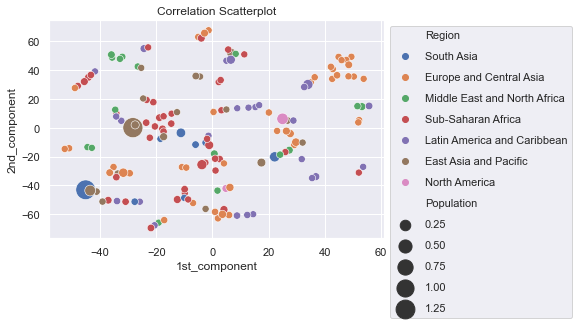

In [13]:
sns.set(rc={'figure.figsize':(7.5, 7.5)})

sns.scatterplot(data = new_df_tsne, x = '1st_component', y = '2nd_component', markers = 'Region', hue = 'Region', size = 'Population', sizes = (50, 400))

plt.legend(bbox_to_anchor=(1, 1), labelspacing = 1, loc=2)
plt.title('Correlation Scatterplot')
plt.show()

In [14]:
def group(row):
    list_c = ['Spain', 'China', 'Netherlands']

    if row.name in list_c:
        return 'Nope'
    else:
        return 'Yes'

In [15]:
test_df = new_df_tsne.copy()
#print(test_df.apply(lambda row: group(row), axis=1))
test_df['In list?'] = df.apply(lambda row: group(row), axis=1).convert_dtypes()

test_df

,,1st_component,2nd_component,Population,In list?
Country,Region,,,,
Afghanistan,South Asia,-2.353757,-10.345737,38928341.0,<NA>
Albania,Europe and Central Asia,42.661842,33.953609,2877800.0,<NA>
Algeria,Middle East and North Africa,53.262192,14.711891,43851043.0,<NA>
Angola,Sub-Saharan Africa,-44.136028,35.025417,32866267.0,<NA>
Argentina,Latin America and Caribbean,-24.361216,55.021935,45195777.0,<NA>
...,...,...,...,...,...
Uruguay,Latin America and Caribbean,53.681656,-27.157444,3473727.0,<NA>
Uzbekistan,Europe and Central Asia,-36.562862,-31.194565,33469199.0,<NA>
Vanuatu,East Asia and Pacific,-25.332624,41.642075,307150.0,<NA>


In [16]:
test_df = new_df_tsne.copy()

list_c = ['Spain', 'China', 'Netherlands']

conditions = [
  np.logical_and(test_df['1st_component'].gt(0), test_df['2nd_component'].gt(0))
]

outputs = ['Yes']

col = pd.Series(np.select(conditions, outputs, 'Nope'), dtype = str, name = 'col')
#print(pd.Series(np.select(conditions, outputs, 'Nope'), dtype = str))
print(pd.Series(np.select(conditions, outputs, 'Nope'), dtype = str).convert_dtypes())

test_df['col'] = (pd.Series(np.select(conditions, outputs, 'Nope'), dtype = str).convert_dtypes())

#test_df = pd.concat([test_df, col], axis = 1, ignore_index = True)

#test_df['col'] = pd.Series(np.select(conditions, outputs, 'Nope'), dtype = str).convert_dtypes()
#test_df.join(col)
test_df

0      Nope
1       Yes
2       Yes
3      Nope
4      Nope
       ... 
148    Nope
149    Nope
150    Nope
151    Nope
152    Nope
Length: 153, dtype: string


,,1st_component,2nd_component,Population,col
Country,Region,,,,
Afghanistan,South Asia,-2.353757,-10.345737,38928341.0,<NA>
Albania,Europe and Central Asia,42.661842,33.953609,2877800.0,<NA>
Algeria,Middle East and North Africa,53.262192,14.711891,43851043.0,<NA>
Angola,Sub-Saharan Africa,-44.136028,35.025417,32866267.0,<NA>
Argentina,Latin America and Caribbean,-24.361216,55.021935,45195777.0,<NA>
...,...,...,...,...,...
Uruguay,Latin America and Caribbean,53.681656,-27.157444,3473727.0,<NA>
Uzbekistan,Europe and Central Asia,-36.562862,-31.194565,33469199.0,<NA>
Vanuatu,East Asia and Pacific,-25.332624,41.642075,307150.0,<NA>


[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0
  0  0  0  0  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1]
153


Text(0.5, 1.0, 'OPTICS Clustering')

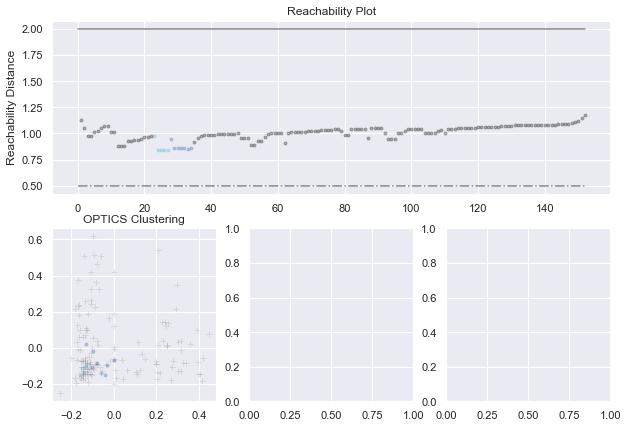

In [17]:


optics_model = OPTICS(min_samples = 5, xi = 0.05, min_cluster_size = 5)
optics_model.fit(df_normalized)

labels1 = cluster_optics_dbscan(reachability = optics_model.reachability_,
core_distances = optics_model.core_distances_,
ordering = optics_model.ordering_, eps = 0.5)

space = np.arange(len(df_normalized))
reachability = optics_model.reachability_[optics_model.ordering_]
labels = optics_model.labels_[optics_model.ordering_]
print(labels)
print(len(labels))

plt.figure(figsize = (10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])

# Plotting the Reachability-Distance Plot
colors = ['c.', 'b.', 'r.', 'y.', 'g.']
for Class, colour in zip(range(0, 5), colors):
    Xk = space[labels == Class]
    Rk = reachability[labels == Class]
    ax1.plot(Xk, Rk, colour, alpha = 0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha = 0.3)
ax1.plot(space, np.full_like(space, 2., dtype = float), 'k-', alpha = 0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype = float), 'k-.', alpha = 0.5)
ax1.set_ylabel('Reachability Distance')
ax1.set_title('Reachability Plot')
  
# Plotting the OPTICS Clustering
colors = ['c.', 'b.', 'r.', 'y.', 'g.']
for Class, colour in zip(range(0, 5), colors):
    Xk = df_normalized[optics_model.labels_ == Class]
    ax2.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3)
      
ax2.plot(df_normalized.iloc[optics_model.labels_ == -1, 0],
        df_normalized.iloc[optics_model.labels_ == -1, 1],
       'k+', alpha = 0.1)
ax2.set_title('OPTICS Clustering')
  

In [18]:
""" #MORRALLA

# K-MEANS CLUSTERING
# Importing Modules
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Loading dataset
iris_df = datasets.load_iris()

# Declaring Model
model = KMeans(n_clusters=3)

# Fitting Model
model.fit(iris_df.data)

# Predicitng a single input
predicted_label = model.predict([[7.2, 3.5, 0.8, 1.6]])

# Prediction on the entire data
all_predictions = model.predict(iris_df.data)

# Printing Predictions
print(predicted_label)
print(all_predictions)


# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :3]  # we only take the first two features.
y = iris.target


fig = plt.figure(figsize=(10,10))
plt = fig.add_subplot(111, projection='3d')
plt.scatter(X[:,0],X[:,1],X[:,2], 
            c=all_predictions, edgecolor='red', s=40, alpha = 0.5)
plt.set_title("First three PCA directions")
plt.set_xlabel("Educational_Degree")
plt.set_ylabel("Gross_Monthly_Salary")
plt.set_zlabel("Claim_Rate")
plt.dist = 10
plt

from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

model = KMeans()
res = model.fit_predict(df)

 """

' #MORRALLA\n\n# K-MEANS CLUSTERING\n# Importing Modules\nfrom sklearn import datasets\nfrom sklearn.cluster import KMeans\nimport matplotlib.pyplot as plt\nfrom sklearn.decomposition import PCA\n# Loading dataset\niris_df = datasets.load_iris()\n\n# Declaring Model\nmodel = KMeans(n_clusters=3)\n\n# Fitting Model\nmodel.fit(iris_df.data)\n\n# Predicitng a single input\npredicted_label = model.predict([[7.2, 3.5, 0.8, 1.6]])\n\n# Prediction on the entire data\nall_predictions = model.predict(iris_df.data)\n\n# Printing Predictions\nprint(predicted_label)\nprint(all_predictions)\n\n\n# import some data to play with\niris = datasets.load_iris()\nX = iris.data[:, :3]  # we only take the first two features.\ny = iris.target\n\n\nfig = plt.figure(figsize=(10,10))\nplt = fig.add_subplot(111, projection=\'3d\')\nplt.scatter(X[:,0],X[:,1],X[:,2], \n            c=all_predictions, edgecolor=\'red\', s=40, alpha = 0.5)\nplt.set_title("First three PCA directions")\nplt.set_xlabel("Educational_Degr